# 🔹 Pascal VOC 2008 Classification Challenge

## 📌 What is Pascal VOC 2008?
Pascal VOC 2008 is a **computer vision dataset** that contains images labeled with **20 object categories**. 
It is used for **object classification, detection, and segmentation**. 

In this assignment, we focus on **image classification** using **transfer learning** with **pre-trained CNN models**.

## 📌 Task: Multi-Label Classification
- **Multi-label classification** means that **one image can contain multiple objects**.
- Example:
  - An image may have both a **dog** and a **car**.
  - The label for that image would be **[dog=1, car=1, everything else=0]**.


# 🔹 Step 2: Import Required Libraries
## 📌 What Will We Do?
- Import necessary **Python libraries** to work with images, XML files, and deep learning models.


In [2]:
# Import standard Python libraries
import os  # For working with files and directories
import xml.etree.ElementTree as ET  # For reading XML annotation files
import pandas as pd  # For handling structured data (tables)
import numpy as np  # For numerical operations
import tensorflow as tf  # For deep learning
import cv2  # OpenCV for image processing
from sklearn.model_selection import train_test_split  # To split data into training and validation sets
import matplotlib.pyplot as plt  # For visualizing images

# 🔹 Step 3: Define Dataset Paths
## 📌 What Will We Do?
- Define the paths to the **dataset directories** where images and annotations are stored.
- Set up an output **CSV file** where we will store extracted information.


In [3]:
# Define the main directory where Pascal VOC 2008 dataset is stored
VOC_ROOT = r"C:\Users\adnan\Downloads\VOCdevkit\VOC2008"

# Important subdirectories in the Pascal VOC dataset
ANNOTATIONS_DIR = os.path.join(VOC_ROOT, "Annotations")  # XML files containing object labels
IMAGE_DIR = os.path.join(VOC_ROOT, "JPEGImages")  # Folder containing train/val images

# Define the output CSV file where parsed annotations will be stored
OUTPUT_CSV = "DLP Lab 5 voc2008_labels.csv"


# 🔹 Step 4: Define Pascal VOC Object Classes
## 📌 Why Do We Need This?
- Pascal VOC stores **class names as text** (e.g., `"dog"`, `"car"`).
- We **convert them into a list** to create a **multi-label vector**.


In [4]:
# Pascal VOC 2008 has 20 object classes
CLASSES = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
           "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]


# 🔹 Step 5: Parse XML Annotations
## 📌 What Will We Do?
- Read **XML annotation files** to extract:
  - **Image paths**
  - **Object labels**
  - **Convert labels into a multi-label format** (each image may have multiple objects).


In [ ]:
def parse_annotation(xml_file):
    """
    Reads an XML annotation file and extracts:
    - Image path
    - Multi-label class vector (20 classes)

    Returns:
        - A list containing [image_path, label_vector]
    """
    # Load the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Extract the image filename
    image_filename = root.find("filename").text
    image_path = os.path.join(IMAGE_DIR, image_filename)  # Create full path

    # Initialize label vector (all zeros initially)
    labels = [0] * len(CLASSES)

    # Read object class names and update label vector
    for obj in root.findall("object"):
        class_name = obj.find("name").text
        if class_name in CLASSES:
            labels[CLASSES.index(class_name)] = 1  # Mark object as present in image

    return [image_path] + labels


# 🔹 Step 6: Process All Annotations and Save to CSV
## 📌 What Will We Do?
- Loop through all **annotation files** in the dataset.
- Convert **XML files into a structured table (CSV format)**.


In [6]:
# List to store processed data
data = []

# Loop through all XML files in the Annotations folder
for xml_file in os.listdir(ANNOTATIONS_DIR):
    if xml_file.endswith(".xml"):  # Ensure it's an XML file
        xml_path = os.path.join(ANNOTATIONS_DIR, xml_file)
        data.append(parse_annotation(xml_path))  # Process XML file

# Convert data to a pandas DataFrame
columns = ["image_path"] + CLASSES
df = pd.DataFrame(data, columns=columns)

# Save the DataFrame as a CSV file
df.to_csv(OUTPUT_CSV, index=False)

print(f"✅ Pascal VOC dataset processed and saved to: {OUTPUT_CSV}")


✅ Pascal VOC dataset processed and saved to: DLP Lab 5 voc2008_labels.csv


# 🔹 Step 7: Verify the Output CSV
## 📌 What Will We Do?
- Load the CSV file to check if **image paths and labels are correct**.
- Print the first few rows.


In [7]:
# Load and display the first few rows of the dataset
df = pd.read_csv(OUTPUT_CSV)
pd.set_option("display.max_colwidth", None)
print(df.head())


                                                              image_path  \
0  C:\Users\adnan\Downloads\VOCdevkit\VOC2008\JPEGImages\2007_000027.jpg   
1  C:\Users\adnan\Downloads\VOCdevkit\VOC2008\JPEGImages\2007_000032.jpg   
2  C:\Users\adnan\Downloads\VOCdevkit\VOC2008\JPEGImages\2007_000033.jpg   
3  C:\Users\adnan\Downloads\VOCdevkit\VOC2008\JPEGImages\2007_000039.jpg   
4  C:\Users\adnan\Downloads\VOCdevkit\VOC2008\JPEGImages\2007_000042.jpg   

   aeroplane  bicycle  bird  boat  bottle  bus  car  cat  chair  ...  \
0          0        0     0     0       0    0    0    0      0  ...   
1          1        0     0     0       0    0    0    0      0  ...   
2          1        0     0     0       0    0    0    0      0  ...   
3          0        0     0     0       0    0    0    0      0  ...   
4          0        0     0     0       0    0    0    0      0  ...   

   diningtable  dog  horse  motorbike  person  pottedplant  sheep  sofa  \
0            0    0      0         

In [39]:
class_counts = df.iloc[:, 1:].sum().sort_values(ascending=False)
print("\n🔹 Class Distribution in Training Data:")
print(class_counts)


🔹 Class Distribution in Training Data:
person         2530
car             549
chair           498
dog             433
cat             372
bird            348
bottle          320
aeroplane       281
tvmonitor       272
sofa            264
motorbike       250
boat            247
pottedplant     245
diningtable     242
horse           242
bicycle         234
train           191
bus             142
cow             108
sheep            96
dtype: int64


# 🔹 Step 8: Load Pascal VOC Dataset into TensorFlow
## 📌 What We Will Do?
- ✅ Read the CSV file and extract image paths & labels.
- ✅ Preprocess images (resize to 224x224, normalize pixel values).
- ✅ Split the dataset into training (80%) and validation (20%).
- ✅ Prepare a tf.data.Dataset pipeline for efficient training.

## 🔹 Step 8.1: Read CSV and Split Data
### 📌 What Will We Do?
- Load the **image paths and labels** from the CSV file.
- Split the dataset into **80% training** and **20% validation** sets.
### 📌 Why This Step?
- We use train_test_split() from sklearn to split the dataset.
- This ensures the model has enough data to learn while keeping some data for evaluation.


In [8]:
# Load the dataset from CSV
df = pd.read_csv(OUTPUT_CSV)

# Extract image paths and labels
image_paths = df["image_path"].values  # Image file paths
labels = df.iloc[:, 1:].values  # All columns except the first one (image path)

# Split data into 80% training and 20% validation
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

# Print dataset sizes
print(f"✅ Training samples: {len(train_paths)}, Validation samples: {len(val_paths)}")


✅ Training samples: 4076, Validation samples: 1020


## 🔹 Step 8.2: Image Preprocessing Function
### 📌 What Will We Do?
- Load images from file paths.
- Resize them to **224x224 pixels** (to match pre-trained CNN models).
- Normalize pixel values to **range [0,1]**.
### 📌 Why This Step?
- Resizing ensures all images have the same dimensions (224x224).
- Normalization (image/255.0) scales pixel values between 0 and 1, making training stable.
- Decoding JPEG images converts them into tensors for TensorFlow.

In [9]:
# Define image size and batch size
IMG_SIZE = (224, 224)  # Standard size for ResNet, VGG, EfficientNet
BATCH_SIZE = 32  # Number of images per training batch

# Function to load and preprocess images
def load_and_preprocess(image_path, label):
    """
    Loads an image from file, resizes it, and normalizes pixel values.

    Args:
        image_path (string): Path to the image file.
        label (list): Multi-label vector (0s and 1s for 20 classes).

    Returns:
        image (tensor): Preprocessed image.
        label (tensor): Corresponding label vector.
    """
    # Read the image file
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG image
    image = tf.image.resize(image, IMG_SIZE)  # Resize to 224x224
    image = image / 255.0  # Normalize pixel values to [0,1]

    return image, label


## 🔹 Step 8.3: Create a TensorFlow Dataset
### 📌 What Will We Do?
- Convert **NumPy arrays** into **TensorFlow datasets**.
- Apply **preprocessing** using `map()`.
- Shuffle, batch, and prefetch the dataset for **efficient training**.
### 📌 Why This Step?
- tf.data.Dataset.from_tensor_slices() → Converts image paths & labels into a TensorFlow dataset.
- map(load_and_preprocess) → Applies the preprocessing function to every image.
- shuffle(1000) → Randomizes image order to prevent overfitting.
- batch(BATCH_SIZE) → Groups images into mini-batches (default: 32).
- prefetch(tf.data.AUTOTUNE) → Loads the next batch while training for efficiency


In [10]:
# Function to create a tf.data dataset
def create_tf_dataset(image_paths, labels):
    """
    Creates a TensorFlow dataset pipeline for training.

    Args:
        image_paths (list): List of image file paths.
        labels (list): Corresponding multi-label vectors.

    Returns:
        dataset (tf.data.Dataset): Preprocessed dataset ready for training.
    """
    # Convert to TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

    # Apply image preprocessing
    dataset = dataset.map(load_and_preprocess)

    # Shuffle, batch, and prefetch for efficiency
    dataset = dataset.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    return dataset

# Create training and validation datasets
train_dataset = create_tf_dataset(train_paths, train_labels)
val_dataset = create_tf_dataset(val_paths, val_labels)

print("✅ TensorFlow dataset is ready!")


✅ TensorFlow dataset is ready!


## 🔹 Step 8.4: Check One Batch
### 📌 What Will We Do?
- Print the shape of one batch of images and labels.
- This ensures that **images and labels are correctly processed**.

- (32, 224, 224, 3) → 32 images, each 224x224, with 3 color channels (RGB).
- (32, 20) → 32 label vectors, each containing 20 class values (0s and 1s).
- ✅ Dataset is correctly formatted and ready for training!


In [11]:
# Fetch one batch from the training dataset
for images, labels in train_dataset.take(1):
    print(f"\n🔹 Batch shape: {images.shape}, Label shape: {labels.shape}")



🔹 Batch shape: (32, 224, 224, 3), Label shape: (32, 20)


# 🔹 Step 9: Define CNN Models Using Transfer Learning
## 📌 What We Will Do?
- ✅ Choose three famous CNN architectures:

- ResNet-50 (Powerful, deep network with skip connections)
- VGG-16 (Simple, traditional CNN with deep layers)
- EfficientNet-B0 (Optimized for accuracy and efficiency)
- ✅ Use pre-trained weights from ImageNet.
- ✅ Freeze base model layers to retain learned features.
- ✅ Add a custom classification head for multi-label classification.

## 🔹 Step 9.1: Load TensorFlow/Keras Modules
### 📌 What Will We Do?
- Import Keras modules for **building CNN models**.
- Load pre-trained CNN architectures from **Keras Applications**.


In [12]:
from tensorflow import keras
from tensorflow.keras import layers, applications


## 🔹 Step 9.2: Define Function to Create CNN Models
### 📌 What Will We Do?
- Create a function that loads **ResNet-50, VGG-16, or EfficientNet-B0**.
- Use **transfer learning** (pre-trained weights from ImageNet).
- Freeze base model layers to retain pre-trained features.
- Add a **new classification head** for Pascal VOC 2008 (20 object categories).
### 📌 Why This Step?
- Uses pre-trained models → Leverages existing knowledge from ImageNet.
- Freezes base model layers → Prevents losing learned features.
- Adds a classification head → Adapts model for Pascal VOC 2008 multi-label classification.
- Uses sigmoid activation → Outputs probabilities for each of the 20 object categories.
- Uses binary_crossentropy loss → Works best for multi-label classification.


In [13]:
# Define the number of classes (Pascal VOC 2008 has 20 classes)
NUM_CLASSES = 20
IMG_SIZE = (224, 224, 3)  # Image dimensions

# Function to create a CNN model with transfer learning
def create_model(model_name="ResNet50"):
    """
    Creates a CNN model using transfer learning.

    Args:
        model_name (str): Name of the CNN architecture to use.
                          Options: "ResNet50", "VGG16", "EfficientNetB0"

    Returns:
        model (keras.Model): Compiled CNN model ready for training.
    """
    # Load the selected base model (pre-trained on ImageNet)
    if model_name == "ResNet50":
        base_model = applications.ResNet50(weights="imagenet", include_top=False, input_shape=IMG_SIZE)
    elif model_name == "VGG16":
        base_model = applications.VGG16(weights="imagenet", include_top=False, input_shape=IMG_SIZE)
    elif model_name == "EfficientNetB0":
        base_model = applications.EfficientNetB0(weights="imagenet", include_top=False, input_shape=IMG_SIZE)
    else:
        raise ValueError("Invalid model name! Choose from ResNet50, VGG16, EfficientNetB0")

    # Freeze base model layers (to retain pre-trained features)
    base_model.trainable = False

    # Build the new classification head
    x = layers.GlobalAveragePooling2D()(base_model.output)  # Convert feature maps to a vector
    x = layers.Dense(512, activation="relu")(x)  # Fully connected layer
    x = layers.Dropout(0.5)(x)  # Dropout for regularization
    output_layer = layers.Dense(NUM_CLASSES, activation="sigmoid")(x)  # Multi-label classification

    # Create the final model
    model = keras.Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss="binary_crossentropy",  # Multi-label classification loss
        metrics=["accuracy"]
    )

    return model


## 🔹 Step 9.3: Create All Three Models
### 📌 What Will We Do?
- Initialize **ResNet-50, VGG-16, and EfficientNet-B0**.
- Print their **architecture summaries** to check layer structure.
### 📌 Why This Step?
- Prints model architectures to verify the number of layers and parameters.
- Confirms that base models are frozen (only new layers are trainable).


In [7]:
# Create models
resnet_model = create_model("ResNet50")
vgg_model = create_model("VGG16")
efficientnet_model = create_model("EfficientNetB0")

# Print model summaries
print("\n🔹 ResNet-50 Model Summary:")
#resnet_model.summary()

print("\n🔹 VGG-16 Model Summary:")
vgg_model.summary()

print("\n🔹 EfficientNet-B0 Model Summary:")
#efficientnet_model.summary()


NameError: name 'create_model' is not defined

## 🔹 Step 9.4: Compare Model Architectures
### 📌 What Will We Do?
- Compare **the number of parameters and depth** of each model.
- Understand which model is **best for speed vs. accuracy**.
### 📌 Key Takeaways:
- ResNet-50 → Best for accuracy but slower (23M parameters).
- VGG-16 → Easiest to understand, moderate speed (14M parameters).
- EfficientNet-B0 → Best for speed, small but powerful (4M parameters).


In [19]:
# Function to compare model sizes
def compare_model_sizes():
    models = {
        "ResNet-50": resnet_model,
        "VGG-16": vgg_model,
        "EfficientNet-B0": efficientnet_model
    }
    
    print("\n🔹 Model Parameter Comparison:")
    for name, model in models.items():
        print(f"{name}: {model.count_params():,} parameters")

# Run model comparison
compare_model_sizes()



🔹 Model Parameter Comparison:
ResNet-50: 24,647,060 parameters
VGG-16: 14,987,604 parameters
EfficientNet-B0: 4,715,703 parameters


# 🔹 Step 10: Train the CNN Models on Pascal VOC 2008
## 📌 What We Will Do?
- ✅ Train all three models (ResNet-50, VGG-16, EfficientNet-B0) on Pascal VOC 2008.
- ✅ Use binary_crossentropy loss for multi-label classification.
- ✅ Monitor training progress with accuracy and loss curves.
- ✅ Implement early stopping and learning rate reduction to improve training.
- ✅ Compare training time, accuracy, and loss across models.

## 🔹 Step 10.1: Load Required Modules for Training
### 📌 What Will We Do?
- Import **Keras callbacks** for monitoring training.
- Set up **early stopping** to prevent overfitting.
- Implement **learning rate reduction** for better convergence.


In [12]:
import time  # For measuring training time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


## 🔹 Step 10.2: Define the Training Function
### 📌 What Will We Do?
- Train the model with **early stopping** (stops if no improvement).
- Use **learning rate reduction** when validation loss plateaus.
- Save the **best model** using `ModelCheckpoint`.
- Log training details with **TensorBoard**.
## 📌 Why This Step?
- Early Stopping (patience=3) → Stops training if validation loss does not improve for 3 consecutive epochs.
- ReduceLROnPlateau (factor=0.2) → Reduces learning rate when loss stops decreasing.
- ModelCheckpoint → Saves the best model weights for later evaluation.
- TensorBoard → Logs training details for visualization.


In [21]:
# Define training parameters
EPOCHS = 10  # Number of epochs to train
BATCH_SIZE = 32  # Batch size for training

# Function to train a CNN model
def train_model(model, train_dataset, val_dataset, model_name):
    """
    Trains a CNN model with early stopping and learning rate scheduling.

    Args:
        model (keras.Model): The CNN model to train.
        train_dataset (tf.data.Dataset): Training dataset.
        val_dataset (tf.data.Dataset): Validation dataset.
        model_name (str): Name of the model (for saving checkpoints/logging).

    Returns:
        history (keras.callbacks.History): Training history object.
        total_time (float): Time taken for training (in seconds).
    """
    print(f"\n🔹 Training {model_name}...\n")

    # Define training callbacks
    callbacks = [
        EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=1e-6),
        ModelCheckpoint(f"DLP Lab 5 {model_name}_best.keras", save_best_only=True, monitor="val_loss"),
        TensorBoard(log_dir=f"logs/{model_name}")
    ]

    # Start training timer
    start_time = time.time()

    # Train the model
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=EPOCHS,
        callbacks=callbacks
    )

    # Compute total training time
    total_time = time.time() - start_time
    print(f"\n✅ {model_name} Training Completed in {total_time:.2f} seconds!")

    return history, total_time


## 🔹 Step 10.3: Train All Three Models
### 📌 What Will We Do?
- Train **ResNet-50, VGG-16, and EfficientNet-B0**.
- Store their training history for comparison.
### 📌 Why This Step?
- We train all three models and measure their training time.
- This allows us to compare performance across models.


In [22]:
# Train models and store training histories
history_resnet, time_resnet = train_model(resnet_model, train_dataset, val_dataset, "ResNet50")
history_vgg, time_vgg = train_model(vgg_model, train_dataset, val_dataset, "VGG16")
history_efficientnet, time_efficientnet = train_model(efficientnet_model, train_dataset, val_dataset, "EfficientNetB0")



🔹 Training ResNet50...

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.2024 - loss: 0.2475 - val_accuracy: 0.2245 - val_loss: 0.2257 - learning_rate: 1.0000e-04
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.2076 - loss: 0.2455 - val_accuracy: 0.2245 - val_loss: 0.2245 - learning_rate: 1.0000e-04
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.2061 - loss: 0.2422 - val_accuracy: 0.2245 - val_loss: 0.2235 - learning_rate: 1.0000e-04
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.1986 - loss: 0.2412 - val_accuracy: 0.2245 - val_loss: 0.2228 - learning_rate: 1.0000e-04
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.2181 - loss: 0.2364 - val_accuracy: 0.2245 - val_loss: 0.2221 - learning_rate: 1.0000e-04
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.2151 - loss: 0.2358 - val_accuracy: 0.2245 - val_loss: 0.2213 - learning_rate: 1.0000e-04
Epoch 7/10
128/128 ━━━━━━━━━━━━━━

## 🔹 Step 10.4: Compare Training Time
### 📌 What Will We Do?
- Visualize **how long each model took to train**.
## 📌 Expected Insights:
- EfficientNet-B0 should be fastest (~4M parameters).
- ResNet-50 will take the longest (~23M parameters).
- VGG-16 is in between (~14M parameters).


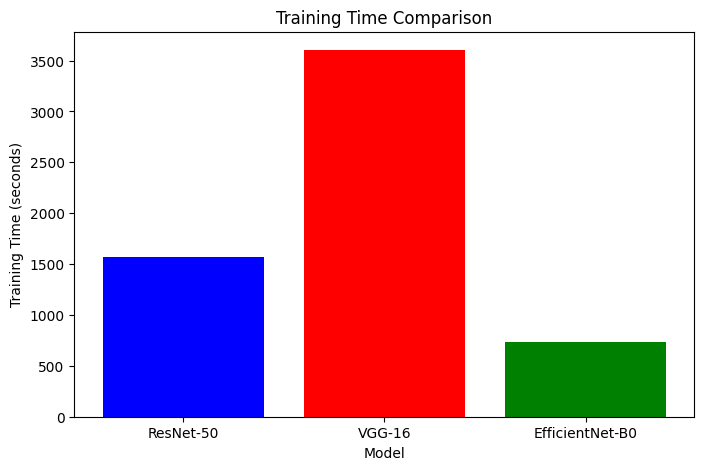

In [23]:
import matplotlib.pyplot as plt

# Training time comparison
models = ["ResNet-50", "VGG-16", "EfficientNet-B0"]
times = [time_resnet, time_vgg, time_efficientnet]

plt.figure(figsize=(8, 5))
plt.bar(models, times, color=['blue', 'red', 'green'])
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison")
plt.show()


## 🔹 Step 10.5: Compare Accuracy and Loss
### 📌 What Will We Do?
- Plot **training and validation loss curves**.
- Plot **training and validation accuracy curves**.
### 📌 Why This Step?
- Loss curves help check for overfitting.
- Accuracy curves show how well models learn over epochs.
- If validation loss stops decreasing, the model may be overfitting.


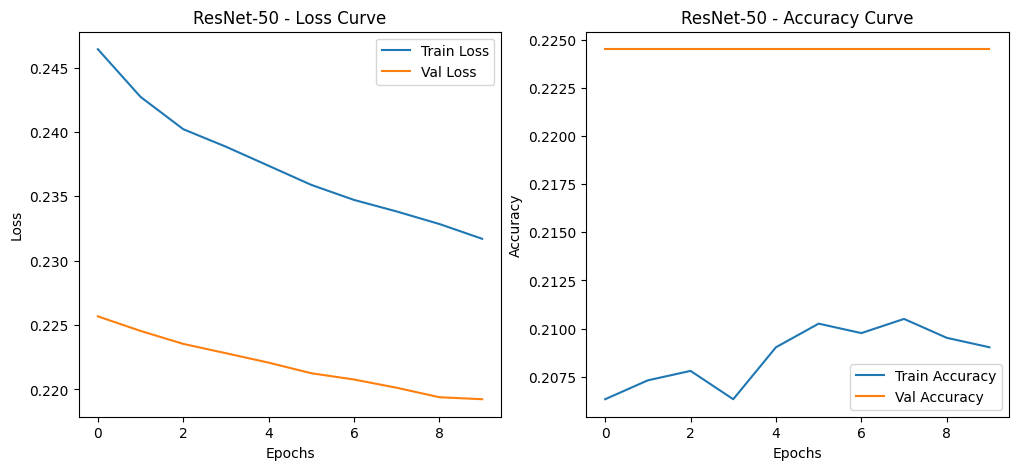

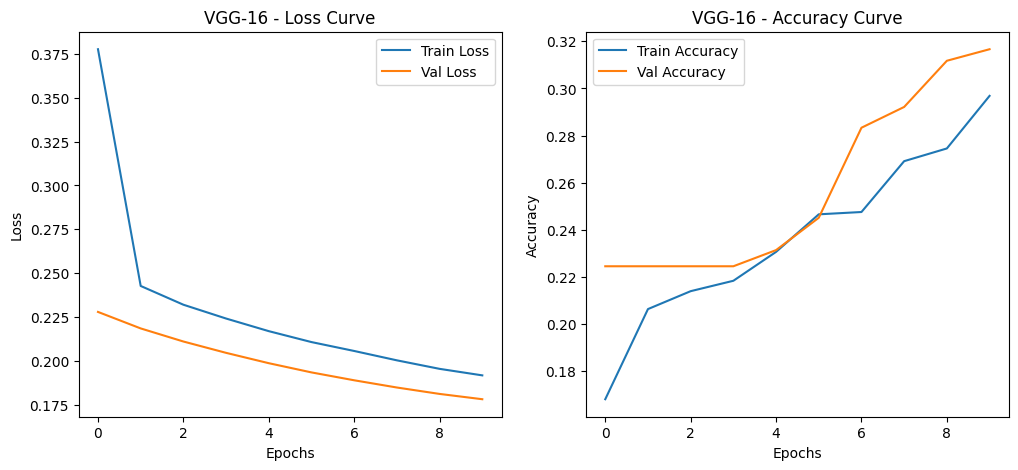

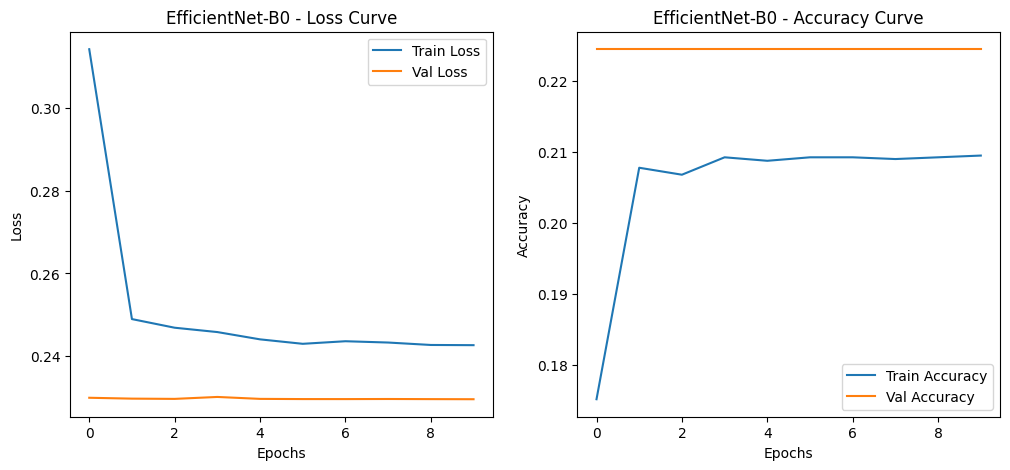

In [24]:
# Function to plot training curves
def plot_training_curves(history, model_name):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"{model_name} - Loss Curve")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"{model_name} - Accuracy Curve")
    plt.legend()

    plt.show()

# Plot curves for all models
plot_training_curves(history_resnet, "ResNet-50")
plot_training_curves(history_vgg, "VGG-16")
plot_training_curves(history_efficientnet, "EfficientNet-B0")


## 🔹 Step 10.6: Evaluate Models Using Mean Average Precision (mAP)
### 📌 What Will We Do?
- Compute **mAP (mean Average Precision)**, a standard metric for Pascal VOC.
- Higher mAP indicates **better classification performance**.

In [25]:
from sklearn.metrics import average_precision_score
import numpy as np

# Function to compute mAP
def compute_map(model, dataset, model_name):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        preds = model.predict(images)
        y_true.append(labels.numpy())
        y_pred.append(preds)

    y_true = np.vstack(y_true)
    y_pred = np.vstack(y_pred)

    map_score = average_precision_score(y_true, y_pred, average="macro")
    print(f"✅ {model_name} mAP: {map_score:.4f}")

    return map_score

# Compute mAP for each model
map_resnet = compute_map(resnet_model, val_dataset, "ResNet-50")
map_vgg = compute_map(vgg_model, val_dataset, "VGG-16")
map_efficientnet = compute_map(efficientnet_model, val_dataset, "EfficientNet-B0")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

# Step 11: Test the models on unseen images
## We need to:
- 1️⃣ Load the test image IDs from **ImageSets/Main/test.txt**.
- 2️⃣ Find the corresponding image files in JPEGImages/.
- 3️⃣ Preprocess the images (resize, normalize).
- 4️⃣ Use the trained models to make predictions.
- 5️⃣ Interpret the predictions (convert probabilities into labels).

## 🔹 Step 11.1: Load Test Image Paths

In [17]:
import os

# Define the folder where test images are stored
TEST_IMAGE_DIR = os.path.join(os.getcwd(), "DLP Lab 5 test images")  # Current working directory

# Create an empty list to store full image paths
test_image_paths = []

# Loop through each file in the test image directory
for filename in os.listdir(TEST_IMAGE_DIR):
    # Check if the file is a JPG image
    if filename.endswith(".jpg"):
        # Create the full path by joining the folder path with the filename
        full_path = os.path.join(TEST_IMAGE_DIR, filename)

        # Add the full path to the list
        test_image_paths.append(full_path)

# Print a few test image paths for verification
print("\n🔹 Example test image paths:", test_image_paths[:5])

# Print the total number of test images found
print(f"✅ Found {len(test_image_paths)} unseen test images in 'DLP Lab 5 test images' folder!")



🔹 Example test image paths: ['d:\\DLP Labs\\DLP Lab 5 test images\\2008_000018.jpg', 'd:\\DLP Labs\\DLP Lab 5 test images\\2008_000122.jpg', 'd:\\DLP Labs\\DLP Lab 5 test images\\2008_000125.jpg', 'd:\\DLP Labs\\DLP Lab 5 test images\\2008_000179.jpg', 'd:\\DLP Labs\\DLP Lab 5 test images\\2008_000220.jpg']
✅ Found 30 unseen test images in 'DLP Lab 5 test images' folder!


# 🔹 Step 11.2: Preprocess Images for Model Input

## 📌 Why This Step?

- Loads images from file.
- Resizes them to 224x224 (same as training images).
- Normalizes pixel values (scales to [0,1]).
- Adds a batch dimension ((1, 224, 224, 3)) for model input.


In [19]:
# Function to preprocess a single image for model prediction
def preprocess_image(image_path):
    """
    Loads and preprocesses an image for model inference.

    Args:
        image_path (str): Path to the image file.

    Returns:
        image (tensor): Preprocessed image ready for prediction.
    """
    # Load the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG
    image = tf.image.resize(image, (224, 224))  # Resize to match model input size
    image = image / 255.0  # Normalize pixel values to [0,1]

    return tf.expand_dims(image, axis=0)  # Add batch dimension (1, 224, 224, 3)


## 🔹 Step 11.3: Load the Best Trained Models
### 📌 Why This Step?
- Loads the best saved models from training.
- Ensures we use the same trained weights for inference.

In [15]:
from tensorflow import keras

# Load the best trained models
best_resnet = keras.models.load_model("DLP Lab 5 ResNet50_best.keras")
best_vgg = keras.models.load_model("DLP Lab 5 VGG16_best.keras")
best_efficientnet = keras.models.load_model("DLP Lab 5 EfficientNetB0_best.keras")

print("✅ All trained models loaded successfully!")


✅ All trained models loaded successfully!


## 🔹 Step 11.4: Run Predictions on Unseen Images
### 📌 Why This Step?
- Picks 5 random unseen images from the test set.
- Preprocesses and feeds them into all three trained models.
- Converts predicted probabilities into class labels (threshold = 0.5).
- Prints the predicted object categories for each model

In [20]:
# Select images for evaluation
selected_test_images = test_image_paths

# Make predictions using all three models
for image_path in selected_test_images:
    print(f"\n🔹 Predicting for image: {image_path}")

    # Preprocess the image
    image = preprocess_image(image_path)

    # Get model predictions
    pred_resnet = best_resnet.predict(image)[0]
    pred_vgg = best_vgg.predict(image)[0]
    pred_efficientnet = best_efficientnet.predict(image)[0]

    # Convert predictions to labels (set a threshold of 0.5)
    threshold = 0.3
    labels_resnet = [CLASSES[i] for i, score in enumerate(pred_resnet) if score > threshold]
    labels_vgg = [CLASSES[i] for i, score in enumerate(pred_vgg) if score > threshold]
    labels_efficientnet = [CLASSES[i] for i, score in enumerate(pred_efficientnet) if score > threshold]

    # Display results
    print(f"📌 ResNet-50 Predictions: {labels_resnet}")
    print(f"📌 VGG-16 Predictions: {labels_vgg}")
    print(f"📌 EfficientNet-B0 Predictions: {labels_efficientnet}")



🔹 Predicting for image: d:\DLP Labs\DLP Lab 5 test images\2008_000018.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
📌 ResNet-50 Predictions: ['person']
📌 VGG-16 Predictions: ['aeroplane']
📌 EfficientNet-B0 Predictions: ['person']

🔹 Predicting for image: d:\DLP Labs\DLP Lab 5 test images\2008_000122.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
📌 ResNet-50 Predictions: ['person']
📌 VGG-16 Predictions: ['person']
📌 EfficientNet-B0 Predictions: ['person']

🔹 Predicting for image: d:\DLP Labs\DLP Lab 5 test images\2008_000125.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
📌 ResNet-50 Predictions: ['person']
📌 VGG-16 Predictions: ['chair', 'person']
📌 EfficientNet-B0 Predictions: ['person']

🔹 Predicting for image: d:\DLP Labs\DLP Lab 5 test images\2008_000179.jpg
1/1 ━━━━━━